# Bioinformatics Analysis

In [1]:
!pip install import_ipynb --no-cache
import import_ipynb

Defaulting to user installation because normal site-packages is not writeable


In [2]:
m = __import__("Methods")

importing Jupyter notebook from Methods.ipynb
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
meta=dict()
data = dict()

In [5]:
meta["RNA-SEQ"] = m.read_meta_data('514')

In [6]:
data["RNA-SEQ"] = pd.read_csv("./data/osd/GLDS-514_rna_seq_Normalized_Counts_GLbulkRNAseq.csv")

In [7]:
data["RNA-SEQ"].head()

Unnamed: 0     Earth_M1     Earth_M2     Earth_M3     Earth_M4  \
0  FBgn0000003   268.326940   289.610821   307.904018   767.736468   
1  FBgn0000008  1211.805611  1163.875378  1055.794866  1091.560477   
2  FBgn0000014     3.721252     6.748211     6.457626     0.000000   
3  FBgn0000015     0.000000     1.572493     9.666983     1.898347   
4  FBgn0000017  5792.651152  6025.273956  5669.638583  5646.796932   

      Earth_F1     Earth_F2     Earth_F3     Earth_F4      SFug_M1  \
0   363.014096   223.520592   237.296136   434.895552   617.512755   
1  1066.283531  1169.359160   986.334465  1181.038372  1340.080214   
2     0.810243     4.260959     2.195389     2.844821     4.401245   
3    14.056209     2.461707    13.225248     7.404185     7.305775   
4  4716.378972  4988.898115  5071.258761  5147.098499  6702.973198   

       SFug_M2      SFug_M3      SFug_M4      SFug_F1      SFug_F2  \
0   397.275093   494.114191   102.733961   540.691165  1227.123863   
1  1189.849152  1132.596904  1302.634134   972.791161  1163.510890   
2     6.346743     1.979916     0.000000     0.000000     3.030498   
3     5.718576     3.049767     2.560166     2.050603     4.914730   
4  5317.186322  6582.326137  7718.806957  4004.071358  4965.857566   

       SFug_F3      SFug_F4      SF1g_M1      SF1g_M2      SF1g_M3  \
0   905.229891   414.117771  1487.063462  1557.208531  1377.858569   
1  1248.041362  1258.849049  1173.876133  1119.218149  1097.009587   
2     0.000000     0.000000     5.328744     0.000000    14.785793   
3     4.797240     9.462406     1.212701     2.167621     3.200357   
4  5206.478374  6145.212985  5983.464767  5956.888079  5813.034554   

       SF1g_M4      SF1g_F1      SF1g_F2      SF1g_F3      SF1g_F4  
0  1120.621546   234.505650   395.502182   350.925252   450.650643  
1  1118.483285  1319.362577  1321.783049  1167.903969  1464.003454  
2     3.172961     6.647281     0.000000     1.016876     2.664084  
3     3.612382     5.795728     2.208960    16.095113    27.152112  
4  6157.063014  5643.030168  6117.758433  5151.717030  5756.307903

In [8]:
meta["RNA-SEQ"]["Sample Name"] = meta["RNA-SEQ"]["Sample Name"].str.replace('_', ' ', regex=False)
meta["RNA-SEQ"].head(meta["RNA-SEQ"].size)

Source Name Sample Name Characteristics[Organism]  \
0                        Earth Male 1    Earth M1   Drosophila melanogaster   
1                        Earth Male 2    Earth M2   Drosophila melanogaster   
2                        Earth Male 3    Earth M3   Drosophila melanogaster   
3                        Earth Male 4    Earth M4   Drosophila melanogaster   
4                      Earth Female 1    Earth F1   Drosophila melanogaster   
5                      Earth Female 2    Earth F2   Drosophila melanogaster   
6                      Earth Female 3    Earth F3   Drosophila melanogaster   
7                      Earth Female 4    Earth F4   Drosophila melanogaster   
8     Spaceflight microgravity Male 1     SFug M1   Drosophila melanogaster   
9     Spaceflight microgravity Male 2     SFug M2   Drosophila melanogaster   
10    Spaceflight microgravity Male 3     SFug M3   Drosophila melanogaster   
11    Spaceflight microgravity Male 4     SFug M4   Drosophila melanogaster   
12  Spaceflight microgravity Female 1     SFug F1   Drosophila melanogaster   
13  Spaceflight microgravity Female 2     SFug F2   Drosophila melanogaster   
14  Spaceflight microgravity Female 3     SFug F3   Drosophila melanogaster   
15  Spaceflight microgravity Female 4     SFug F4   Drosophila melanogaster   
16              Spaceflight 1g_Male 1     SF1g M1   Drosophila melanogaster   
17              Spaceflight 1g_Male 2     SF1g M2   Drosophila melanogaster   
18              Spaceflight 1g_Male 3     SF1g M3   Drosophila melanogaster   
19              Spaceflight 1g_Male 4     SF1g M4   Drosophila melanogaster   
20            Spaceflight 1g_Female 1     SF1g F1   Drosophila melanogaster   
21            Spaceflight 1g_Female 2     SF1g F2   Drosophila melanogaster   
22            Spaceflight 1g_Female 3     SF1g F3   Drosophila melanogaster   
23            Spaceflight 1g_Female 4     SF1g F4   Drosophila melanogaster   

   Term Source REF                              Term Accession Number  \
0        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
1        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
2        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
3        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
4        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
5        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
6        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
7        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
8        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
9        NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
10       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
11       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
12       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
13       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
14       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
15       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
16       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
17       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
18       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
19       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
20       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
21       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
22       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   
23       NCBITAXON  http://purl.bioontology.org/ontology/NCBITAXON...   

   Characteristics[Strain] Term Source REF.1  \
0                    W1118              GLDS   
1                    W1118              GLDS   
2                    W1118              GLDS   
3                    W1118      

# Convert Gene IDs to Symbols

In [9]:
# Import the MyGeneInfo module
mg = m.mygene.MyGeneInfo()

# Get the list of FlyBase gene IDs from your data
flybase_ids = list(data["RNA-SEQ"]['Unnamed: 0'])

# Query MyGeneInfo for FlyBase IDs
ginfo = mg.querymany(flybase_ids, scopes='flybase')

# Initialize lists to keep track of genes to drop and those with symbols
drop_list = []
hit_list = []

# Iterate through the query results
for g in ginfo:
    # Check if the gene has a 'symbol'; if not, add to the drop list
    if 'symbol' not in g:
        drop_list.append(g['query'])
    else:
        # Check if the gene symbol is already in the hit list; if not, add it
        if g['symbol'] not in hit_list:
            # Replace the FlyBase ID with its corresponding gene symbol
            data["RNA-SEQ"].loc[data["RNA-SEQ"]['Unnamed: 0'] == g['query'], 'Unnamed: 0'] = g['symbol']
            hit_list.append(g['symbol'])

# Print the shape of the RNA-seq data before filtering
print('RNA-seq data shape before: ', data["RNA-SEQ"].shape)

# Remove rows where the gene ID did not have a corresponding symbol
data["RNA-SEQ"] = data["RNA-SEQ"][~data["RNA-SEQ"]['Unnamed: 0'].isin(drop_list)]

# Print the shape of the RNA-seq data after filtering
print('RNA-seq data shape after: ', data["RNA-SEQ"].shape)


2040 input query terms found no hit:	['FBgn0001981', 'FBgn0003888', 'FBgn0004364', 'FBgn0010812', 'FBgn0011655', 'FBgn0019643', 'FBgn0025


RNA-seq data shape before:  (16675, 25)
RNA-seq data shape after:  (14635, 25)


# Prepare for use in DESeq2 Analysis

In [10]:
def transpose_df(df, cur_index_col, new_index_col):
  df = df.set_index(cur_index_col).T
  df.reset_index(level=0, inplace=True)
  cols = [new_index_col] + list(df.columns)[1:]
  df.columns = cols
  return df

In [11]:
rna_seq = m.transpose_df(data["RNA-SEQ"], cur_index_col='Unnamed: 0', new_index_col = 'sample')
# Safely replace underscores with spaces without using regex
rna_seq['sample'] = rna_seq['sample'].str.replace('_', ' ', regex=False)
rna_seq.head()

sample  7SLRNA:CR32864            a     abd-A      Abd-B          Abl  \
0  Earth M1      268.326940  1211.805611  3.721252   0.000000  5792.651152   
1  Earth M2      289.610821  1163.875378  6.748211   1.572493  6025.273956   
2  Earth M3      307.904018  1055.794866  6.457626   9.666983  5669.638583   
3  Earth M4      767.736468  1091.560477  0.000000   1.898347  5646.796932   
4  Earth F1      363.014096  1066.283531  0.810243  14.056209  4716.378972   

          abo           Ace        acj6      Acph-1  nAChRalpha1      mAChR-A  \
0  200.221130  11287.761373  425.051856  391.203124  2031.260960  3057.414526   
1  231.513901  11197.471977  406.363064  419.497862  1985.157668  3155.636105   
2  234.751418  10560.234965  397.471821  435.933002  1821.846297  2851.433518   
3  246.590799  10436.129453  465.545397  354.427337  1593.792940  3029.627694   
4  260.211554   8114.340210  419.436546  455.983332  1611.663082  2611.400899   

    nAChRbeta1  nAChRalpha2         Act5C       Act42A        Act57B  \
0  6959.049870  1217.080354  23363.951336  1015.104337  21196.940180   
1  7400.020393  1207.447426  24364.787898  1008.850635  22758.627704   
2  6636.972039  1134.216308  25654.577433  1014.104901  24394.238088   
3  6313.156597  1134.850865  21833.729923  1041.211487  23945.284707   
4  5493.877203   926.059138  23859.841504  1232.302275  24242.275478   

        Act79B       Act87E       Act88F         Pfas         Gart  \
0  2237.162514  2753.357502   199.116747  1862.186147  1585.406560   
1  2647.655215  2817.031811   280.989706  1914.761522  1633.942778   
2  2563.051209  3020.998289  3843.498500  2043.955453  1355.313151   
3  2539.556131  3214.949684   321.763147  1813.185662  1435.538474   
4  1249.476273  2985.645907  1844.429631  2026.805331  1852.438408   

            Adh         Adhr          adp         al        Mps1  \
0  63138.154035   407.604878  1023.109126  41.522482  101.709396   
1  55553.025630   421.064928  1038.593800  39.917650   79.982034   
2  63198.431873   587.742672  1007.418167  35.667959  101.245792   
3  49086.029355  1546.215844   966.785820  39.509636   97.966541   
4  50637.133819   394.285127  1145.258979  42.249628   90.206624   

           Ald1        Ama         amd         amx        Amy-d        Amy-p  \
0  26635.853283  40.778870  359.495799  251.624434  3643.308441  2330.348206   
1  26479.661159  73.695306  365.654370  305.524347  3762.946957  1712.487391   
2  40706.075204  56.703668  393.614081  285.160347  3567.006071  1729.971298   
3  23190.885573  64.220537  378.765420  295.051996  2994.500819  1543.358711   
4  26752.535578  43.450368  341.820203  279.832773  1659.278836   610.897255   

         AnxB9       AnxB10         dyw          aop         RpLP0  \
0  5990.047477  3668.316805  101.767414  1624.529408  31194.935276   
1  6133.700703  3779.138433   86.502410  1631.823297  32242.999362   
2  6574.706321  3613.364102  116.560260  1520.250339  33606.207519   
3  6391.757700  3895.942782  116.971286  1440.941999  33440.287929   
4  6785.033995  4518.148245   43.035858  1632.276331  40896.675661   

           Appl        Aprt         bru1        Arl1         Argk1  \
0  25574.445222  192.933316  1648.769286  571.228627  42815.680111   
1  26897.578668  199.659615  1574.562723  604.055968  38867.556652   
2  23922.106510  183.339501  1949.396725  585.521558  41581.967252   
3  23762.702239  266.604444  1488.611347  615.785294  36271.287533   
4  22013.587117  280.538461  1737.010636  648.084122  35365.438460   

            arm          arr           Arr1           Arr2       ase  \
0  11822.145571  1344.814047  157233.721356  319413.743639  0.000000   
1  12376.447460  1227.433506  169438.401867  351035.784174  0.888251   
2  11482.197804  1226.957321  169576.875937  361139.703588  0.000000   
3  11991.944288  1138.011707  158576.916888  349943.693869  0.000000   
4  10842.496574  1213.234847  142698.464523  309298.847838  0.000000   

         ash2        asp      

In [12]:
meta["RNA-SEQ"][meta["RNA-SEQ"]['Sample Name']=="Earth F1"]['Factor Value[Spaceflight]'].values[0]

'Ground Control'

In [13]:
# First let's create a conditions table for 'Factor Value: Spaceflight'. We'll assign 0 for ground control, 1 for SFug and 2 for SF1g
condition_dict=dict()
for sample in list(rna_seq['sample']):
    val=sample.split(" ")[0]
    if val == 'Earth':
        condition_dict[sample] = 0
    elif val == "SFug":
        condition_dict[sample] = 1
    elif val == "SF1g":
        condition_dict[sample] = 2
rna_seq["condition"] = rna_seq["sample"].map(condition_dict)
conditions=rna_seq[['sample', 'condition']]
conditions

sample  condition
0   Earth M1          0
1   Earth M2          0
2   Earth M3          0
3   Earth M4          0
4   Earth F1          0
5   Earth F2          0
6   Earth F3          0
7   Earth F4          0
8    SFug M1          1
9    SFug M2          1
10   SFug M3          1
11   SFug M4          1
12   SFug F1          1
13   SFug F2          1
14   SFug F3          1
15   SFug F4          1
16   SF1g M1          2
17   SF1g M2          2
18   SF1g M3          2
19   SF1g M4          2
20   SF1g F1          2
21   SF1g F2          2
22   SF1g F3          2
23   SF1g F4          2

In [14]:
# remove sample and condition from rna_seq dataframe
counts=rna_seq.drop(columns=['sample', 'condition']).reset_index(drop=True)
# check for non-numeric
counts.applymap(m.np.isreal)
# convert all cells to integers
counts=counts.astype(int)
counts.head()

7SLRNA:CR32864     a  abd-A  Abd-B   Abl  abo    Ace  acj6  Acph-1  \
0             268  1211      3      0  5792  200  11287   425     391   
1             289  1163      6      1  6025  231  11197   406     419   
2             307  1055      6      9  5669  234  10560   397     435   
3             767  1091      0      1  5646  246  10436   465     354   
4             363  1066      0     14  4716  260   8114   419     455   

   nAChRalpha1  mAChR-A  nAChRbeta1  nAChRalpha2  Act5C  Act42A  Act57B  \
0         2031     3057        6959         1217  23363    1015   21196   
1         1985     3155        7400         1207  24364    1008   22758   
2         1821     2851        6636         1134  25654    1014   24394   
3         1593     3029        6313         1134  21833    1041   23945   
4         1611     2611        5493          926  23859    1232   24242   

   Act79B  Act87E  Act88F  Pfas  Gart    Adh  Adhr   adp  al  Mps1   Ald1  \
0    2237    2753     199  1862  1585  63138   407  1023  41   101  26635   
1    2647    2817     280  1914  1633  55553   421  1038  39    79  26479   
2    2563    3020    3843  2043  1355  63198   587  1007  35   101  40706   
3    2539    3214     321  1813  1435  49086  1546   966  39    97  23190   
4    1249    2985    1844  2026  1852  50637   394  1145  42    90  26752   

   Ama  amd  amx  Amy-d  Amy-p  AnxB9  AnxB10  dyw   aop  RpLP0   Appl  Aprt  \
0   40  359  251   3643   2330   5990    3668  101  1624  31194  25574   192   
1   73  365  305   3762   1712   6133    3779   86  1631  32242  26897   199   
2   56  393  285   3567   1729   6574    3613  116  1520  33606  23922   183   
3   64  378  295   2994   1543   6391    3895  116  1440  33440  23762   266   
4   43  341  279   1659    610   6785    4518   43  1632  40896  22013   280   

   bru1  Arl1  Argk1    arm   arr    Arr1    Arr2  ase  ash2  asp  aub  aurA  \
0  1648   571  42815  11822  1344  157233  319413    0   770   17   11    74   
1  1574   604  38867  12376  1227  169438  351035    0   839   11   13    78   
2  1949   585  41581  11482  1226  169576  361139    0   938   27   27    75   
3  1488   615  36271  11991  1138  158576  349943    0   930   11   17    97   
4  1737   648  35365  10842  1213  142698  309298    0   901   17   26    83   

    awd  Axs     b   Dll  bam   baz  bcd   ben   bi  bib    bic  BicC  BicD  \
0  6917  519  7220  1121    4  3418    0  3310  880  223   8951     5  3231   
1  7091  482  7906  1127    0  3503    1  3187  888  263   9824     4  3294   
2  7056  486  7245  1092    1  3509    5  3165  784  189   9746    18  3211   
3  9281  476  6877   982    2  3022    0  2904  856  185   9687     1  3067   
4  9474  527  6422   905    3  3077    2  3415  806  202  11763     0  3016   

   boss   brm  brn   Nin   bsk  btd   bur    bw    by  c(3)G    ca  cact  cad  \
0  5304  3243  264  2145  2855   57  2611  2068  2873    200  2469  4445    1   
1  5595  3141  201  2333  2862   47  2632  2109  2981    191  2536  4918    2   
2  5556  3033  201  2199  2803   57  2663  2103  2859    198  2562  5030    8   
3  4896  3162  249  2095  2896   48  2636  2330  2838    195  2230  4617    0   
4  4859  3144  140  2050  2444   25  2988  2325  3015    188  2147  5147    0   

     Cam  capu  car  CkIIbeta   Cat  Pka-C1  Pka-C2  CecA1  CecA2  CecB  CecC  \
0  48800  3018  904      2818  8005    9617       4     40     45     0     6   
1  50907  3006  943      2841  8936    9768       5      1      4     0     0   
2  49461  2883  897      2828  9445    8799       6      8      7     0    12   
3  44417  2762  896      2806  7943    8717       0    346    574     2    31   
4  43628  2641  798      2901  8921    8036       0     16     10     0     9   

   Cp190   Cf2  salr    cg  Col4a1  ChAT  chif  chic   cin    ck    cl    Chc  \
0   2827  2158   986  5990    7987  2990  2696  7383   834  1791  1710  12691   
1   2989  2272   972  6314    7716  3100  2644  7437   827  1863  1778  12746

# DESeq2 Experiment

In [15]:
# run the DESEq2 experiment contrasting conditin "0" (ground control) to condition "1" (spaceflight)
dds=m.DeseqDataSet(counts=counts, metadata=conditions, design_factors="condition")
dds.deseq2()
stats_results = m.DeseqStats(dds, contrast = ('condition', '0', '1'))
stats_results.summary()
res = stats_results.results_df

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 9.82 seconds.

Fitting dispersion trend curve...
... done in 2.00 seconds.

Fitting MAP dispersions...
... done in 13.89 seconds.

Fitting LFCs...
... done in 5.36 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 226 outlier genes.

Fitting dispersions...
... done in 0.18 seconds.

Fitting MAP dispersions...
... done in 0.23 seconds.

Fitting LFCs...
... done in 0.36 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
                   baseMean  log2FoldChange     lfcSE      stat        pvalue  \
7SLRNA:CR32864   604.790219       -0.704555  0.404540 -1.741622  8.157469e-02   
a               1176.645813       -0.111274  0.071014 -1.566939  1.171289e-01   
abd-A              2.825190        0.712173  1.011757  0.703897  4.814971e-01   
Abd-B              5.904117        0.379688  0.732077  0.518645  6.040082e-01   
Abl             5665.426444       -0.120957  0.097089 -1.245836  2.128247e-01   
...                     ...             ...       ...       ...           ...   
asRNA:CR46487      1.206439       -1.491450  1.284849 -1.160798  2.457240e-01   
lncRNA:CR46488   119.612804        0.252878  0.215705  1.172334  2.410632e-01   
lncRNA:CR46489    40.543566        1.925705  0.261681  7.358972  1.853315e-13   
lncRNA:CR46490     0.789518       -1.262070  2.264659 -0.557289  5.773300e-01   
dbf               21.119310       -1.467194  1.843809 

... done in 2.00 seconds.



In [16]:
# run the DESEq2 experiment contrasting conditin "0" (ground control) to condition "1" (spaceflight)
dds2=m.DeseqDataSet(counts=counts, metadata=conditions, design_factors="condition")
dds2.deseq2()
stats_results2 = m.DeseqStats(dds2, contrast = ('condition', '0', '2'))
stats_results2.summary()
res2 = stats_results2.results_df

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 13.62 seconds.

Fitting dispersion trend curve...
... done in 1.59 seconds.

Fitting MAP dispersions...
... done in 13.20 seconds.

Fitting LFCs...
... done in 5.50 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 226 outlier genes.

Fitting dispersions...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 0.25 seconds.

Fitting LFCs...
... done in 0.20 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 2
                   baseMean  log2FoldChange     lfcSE      stat        pvalue  \
7SLRNA:CR32864   604.790219       -1.272673  0.404360 -3.147374  1.647439e-03   
a               1176.645813       -0.133288  0.070987 -1.877641  6.043034e-02   
abd-A              2.825190       -0.432187  0.970579 -0.445287  6.561121e-01   
Abd-B              5.904117       -0.328771  0.716540 -0.458831  6.463553e-01   
Abl             5665.426444       -0.114602  0.097089 -1.180378  2.378501e-01   
...                     ...             ...       ...       ...           ...   
asRNA:CR46487      1.206439       -1.002921  1.307752 -0.766905  4.431382e-01   
lncRNA:CR46488   119.612804       -0.003978  0.214763 -0.018522  9.852225e-01   
lncRNA:CR46489    40.543566        1.521010  0.255442  5.954433  2.609747e-09   
lncRNA:CR46490     0.789518        1.044146  2.410951  0.433085  6.649533e-01   
dbf               21.119310       -3.543542  1.839062 

... done in 2.27 seconds.



In [17]:
# run the DESEq2 experiment contrasting conditin "0" (ground control) to condition "1" (spaceflight)
dds3=m.DeseqDataSet(counts=counts, metadata=conditions, design_factors="condition")
dds3.deseq2()
stats_results3 = m.DeseqStats(dds2, contrast = ('condition', '1', '2'))
stats_results3.summary()
res3 = stats_results3.results_df

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.47 seconds.

Fitting dispersion trend curve...
... done in 2.69 seconds.

Fitting MAP dispersions...
... done in 13.31 seconds.

Fitting LFCs...
... done in 5.26 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 226 outlier genes.

Fitting dispersions...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 0.23 seconds.

Fitting LFCs...
... done in 0.18 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 1 vs 2
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
7SLRNA:CR32864   604.790219       -0.568118  0.404018 -1.406171  0.159673   
a               1176.645813       -0.022014  0.070870 -0.310622  0.756088   
abd-A              2.825190       -1.144359  1.000137 -1.144202  0.252540   
Abd-B              5.904117       -0.708459  0.725908 -0.975962  0.329083   
Abl             5665.426444        0.006355  0.097070  0.065465  0.947803   
...                     ...             ...       ...       ...       ...   
asRNA:CR46487      1.206439        0.488529  1.200962  0.406782  0.684168   
lncRNA:CR46488   119.612804       -0.256856  0.215695 -1.190827  0.233721   
lncRNA:CR46489    40.543566       -0.404695  0.273691 -1.478656  0.139232   
lncRNA:CR46490     0.789518        2.306216  2.360274  0.977097  0.328521   
dbf               21.119310       -2.076349  1.828101 -1.135795  0.256042   

                    

... done in 2.09 seconds.



In [18]:
# extract results of the DESeq2 experiment where  padj < 0.05, and log2fc > 0
#res = res[res.baseMean >= 10000]
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0)]
gene_list=list(sigs.index)
gene_list

['Act5C',
 'Act57B',
 'Ama',
 'AnxB9',
 'Arr1',
 'Arr2',
 'aub',
 'Dll',
 'Cam',
 'Col4a1',
 'ChAT',
 'cn',
 'Cp19',
 'Cp38',
 'crc',
 'CycA',
 'Dab',
 'Sap-r',
 'Ddc',
 'ect',
 'Cyp6a2',
 'Pka-C3',
 'dsx',
 'eag',
 'egl',
 'Est-6',
 'Fas3',
 'Fbp1',
 'Fbp2',
 'fj',
 'flw',
 'g',
 'Gal',
 'grau',
 'gt',
 'hb',
 'Hn',
 'Hsc70-3',
 'Hsf',
 'Hsp67Ba',
 'Hsp67Bc',
 'Hsp83',
 'lncRNA:Hsromega',
 'hth',
 'in',
 'inaD',
 'kkv',
 'kz',
 'dlg1',
 'Cyp303a1',
 'CG5504',
 'LanA',
 'Mal-A1',
 'mus312',
 'ndl',
 'net',
 'ninaA',
 'nkd',
 'Pc',
 'Pcp',
 'peb',
 'Pfk',
 'pip',
 'Pkc53E',
 'Poxn',
 'Ppn',
 'CG2841',
 'Pu',
 'r',
 'rdgB',
 'sev',
 'shg',
 'stwl',
 'so',
 'spn-B',
 'stau',
 'su(f)',
 'sws',
 'CCT1',
 'tld',
 'tra',
 'trp',
 'tud',
 'hid',
 'yrt',
 'kst',
 'Csp',
 'neb',
 'RasGAP1',
 'shtd',
 'Vinc',
 'Pep',
 'Fur1',
 'Oct-TyrR',
 'Pxd',
 'GluRIIA',
 'Rap1',
 'sim',
 'Ccp84Ab',
 'Ccp84Aa',
 'inaC',
 'Hrb27C',
 'ci',
 'Rb97D',
 'gol',
 'Ggamma1',
 'Su(fu)',
 'Mbs',
 'sv',
 'Hdc',
 'PCNA',

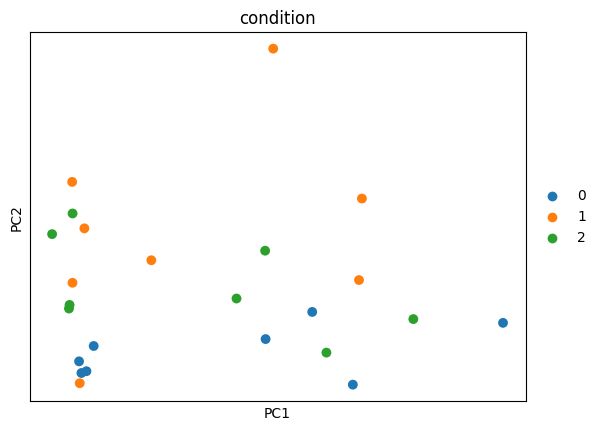

In [19]:
# let's plot PCA
m.sc.tl.pca(dds)
m.sc.pl.pca(dds, color='condition', size=200)

In [20]:
# first use the DESeq2 results to rank the genes based on the statistic 'stat' and convert genes to upper case
ranking = res[['stat']].dropna().sort_values('stat', ascending=False)
ranking_index=list(ranking.index)
ranking_index_upper=[x.upper() for x in ranking_index]
ranking.index=ranking_index_upper
ranking

stat
CG34134  17.235257
ACHL     15.411333
CULD     10.374987
T        10.098938
CG4660    9.681244
...            ...
CG42361  -7.668084
CG7906   -7.688560
CG45078  -9.101754
CG17211  -9.788948
MWH     -12.288071

[14635 rows x 1 columns]

In [21]:
# look at the names of the libraries that are available to use for PEA and GSEA
gene_sets = m.gp.get_library_name(organism="fly")

# Enrichr Analysis w/Different Gene Sets
Can be found [here](https://maayanlab.cloud/FlyEnrichr/#stats)

In [22]:
# Perform GO enrichment analysis with FlyBase genes using Enrichr
enr = m.gp.enrichr(
    gene_list=gene_list,  # List of FlyBase gene symbols
    gene_sets=gene_sets,
    organism='fly',  # Set to 'fly' for Drosophila (FlyBase genes)
    outdir=None
)

enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

Term  \
0                               recessive   
1            eye photoreceptor cell stalk   
2    rhabdomere of eye photoreceptor cell   
4        gonadal sheath proper primordium   
5                    GO0016028:rhabdomere   
6   embryonic/first instar larval cuticle   
7                           somatic clone   
8             GO0005912:adherens junction   
9                             conditional   
10                            amnioserosa   

                                                Genes  Adjusted P-value  
0   AstA;tud;Acsl;baf;Shark;Lnk;egl;peb;kst;tum;mt...      3.444622e-09  
1                                         crb;sdt;yrt      4.169987e-02  
2                               crb;trp;rdgB;yrt;Culd      2.879594e-02  
4                                 hid;tra;shg;dsx;mid      2.077191e-02  
5   norpA;Cpn;Rab11;sdt;Acsl;cno;sev;RasGAP1;Lnk;k...      8.152655e-05  
6   sdt;nkd;14-3-3epsilon;neb;tum;Shc;Hsc70-4;crb;...      3.233261e-05  
7   Acsl;RasGAP1;Shark;Lnk;MED19;peb;Shc;path;Pc;h...      5.786901e-04  
8                               crb;shg;Rap1;yrt;dlg1      4.191040e-02  
9   norpA;Csp;hid;Acsl;Debcl;ninaA;Arr2;crb;trp;Dc...      2.276758e-03  
10                     Rab11;crb;sdt;LanA;peb;dia;tld      1.599600e-02

In [23]:
# Perform GO enrichment analysis with FlyBase genes using Enrichr
enr = m.gp.enrichr(
    gene_list=gene_list,  # List of FlyBase gene symbols
    gene_sets=[
        'GO_Molecular_Function_2018',
        'GO_Cellular_Component_2018',
        'GO_Biological_Process_2018'
    ],
    organism='fly',  # Set to 'fly' for Drosophila (FlyBase genes)
    outdir=None
)

enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

Term  \
0   lysophospholipid acyltransferase activity (GO:...   
2          neuropeptide receptor binding (GO:0071855)   
4   phosphatidylinositol bisphosphate binding (GO:...   
5          neuropeptide hormone activity (GO:0005184)   
6   structural constituent of chitin-based larval ...   
9   hydrolase activity, acting on carbon-nitrogen ...   
26                     metal ion binding (GO:0046872)   
27                  phosphatase activity (GO:0016791)   
34               protein kinase activity (GO:0004672)   
44                       kinase activity (GO:0016301)   

                                                Genes  Adjusted P-value  
0                               EndoB;EndoA;LPCAT;oys          0.029821  
2                            AstA;Proc;Capa;Ms;Tk;Crz          0.029821  
4   CG10237;CG5973;Moe;CG10026;CG10657;pinta;dia;Abp1          0.029821  
5             AstA;Proc;Capa;ITP;Nplp1;Ms;Tk;Crz;AstC          0.029821  
6   Cpr50Ca;Cpr62Bb;Cpr97Eb;Cpr62Bc;Cpr64Aa;CG1551...          0.000533  
9   CG31373;CG6733;CG1827;CG17109;serp;Cda4;bwa;ve...          0.029821  
26  Cpn;CG11638;Cad99C;Cad89D;regucalcin;Nmdmc;Gs1...          0.029821  
27  CG12237;Ppm1;Gs1l;CG9452;Ocrl;Lpin;CG12091;Alp...          0.029821  
34  Pka-C3;fj;Nrk;gish;Shark;Pask;inaC;Nek2;RIOK1;...          0.029821  
44  hppy;fj;Dsor1;Slob;Pask;Ipk1;CG3631;fbl;Dyrk2;...          0.029821

In [24]:
# use enrichR to get enriched pathways from KEGG (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['KEGG_2019' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

Term  \
0                 Inositol phosphate metabolism   
1                      ECM-receptor interaction   
12                            Phototransduction   
20                      Hippo signaling pathway   
35                                  Endocytosis   
54  Protein processing in endoplasmic reticulum   

                                                Genes  Adjusted P-value  
0   norpA;CG17029;CG9784;Sac1;Ocrl;Inos;Tpi;CG6805...          0.049192  
1                              Tsp;Col4a1;Hml;wb;LanA          0.020945  
12   norpA;Act5C;trp;inaC;inaD;Pkc53E;Act57B;Cam;Arr2          0.020945  
20  crb;sdt;Act5C;Patj;fj;14-3-3epsilon;Pak;dlg1;d...          0.046019  
35  lqf;Rab11;Vps60;Dab;ALiX;Chmp1;CG8243;Gprk2;Us...          0.010299  
54  CG10973;shv;Csp;Gp93;Ostgamma;CG3061;Hsp83;Ede...          0.022767

In [25]:
# use enrichR to get enriched pathways from WikiPathways_2018 (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['WikiPathways_2018' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

Empty DataFrame
Columns: [Term, Genes, Adjusted P-value]
Index: []

In [26]:
#  use enrichR to get enriched pathways from  ARCHS4_Tissues
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['RNAi_Screens_from_GenomeRNAi_2017' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

Term  \
1  Germline stem cell (GSC) regulation from Yan e...   
2  Gq-linked GPCR signalling from Vaque et al. 20...   
4  C. trachomatis infection from Elwell et al. 20...   
5  Adiposity regulation from Baumbach et al. 2014...   

                                               Genes  Adjusted P-value  
1  eIF4G1;koi;gish;MED19;CG40006;egl;tum;Stip1;Pf...          0.042745  
2  CG31373;Obp56c;CG11768;CG13305;MED19;CG6340;pe...          0.036308  
4  Vinc;Mo25;alpha-Est10;Chmp1;CG8243;Tpc2;tum;WA...          0.042745  
5  CG9171;Cyp6a20;RasGAP1;Shark;CG8243;egl;peb;CG...          0.042745

In [27]:
#  use enrichR to get enriched pathways from  ARCHS4_Tissues
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['Allele_Phenotypes_from_FlyBase_2017' ],
                 organism='fly',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

Term  \
0                   viable, with ScerGAL4[pnr-MD237]   
1  viable, with Dcr-2[ScerUAS.cDa], ScerGAL4[elav...   
2                     viable, with ScerGAL4[Mef2.PR]   
3                 viable, with ScerGAL4[tin.CDelta4]   
4              pupal stage, with ScerGAL4[elav-C155]   
5                                            fertile   
6                                        mesectoderm   
7             embryonic stage, with ScerGAL4[fkh.PH]   
8                                             viable   
9          dorsal closure stage, with ScerGAL4[c381]   

                                               Genes  Adjusted P-value  
0  CG9171;hng3;CG17109;Prestin;egl;Pask;kst;CG404...      0.000000e+00  
1  CG9171;hng3;eIF4G1;CG17109;Prestin;egl;Pask;ks...      0.000000e+00  
2  CG9171;hng3;CG17109;Prestin;Pask;kst;CG40486;G...      0.000000e+00  
3  CG9171;eIF4G1;CG17109;Prestin;egl;Pask;kst;gkt...      5.000000e-16  
4                                EndoA;jeb;Debcl;fne      6.688553e-03  
5  CG9171;CG11367;CG14636;CG6340;path;CG42540;Cpr...      1.065000e-13  
6                                cno;sim;RhoGEF2;vvl      6.688553e-03  
7                                Sema2a;crb;dia;WASp      1.375755e-02  
8  CG9171;egl;kst;path;CG42540;scf;Fas3;Cpr92F;GM...      3.680219e-10  
9                                   crb;Rap1;Pak;dia      1.375755e-02